In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
defaulter= pd.read_csv("D:/aiml/bank-additional-full.csv")
defaulter


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [15]:
from sklearn.preprocessing import MinMaxScaler
#applying MinMaxScaler to the default dataset
scaler = MinMaxScaler()
features_to_scale = ["duration","age"]
scaled_values = scaler.fit_transform(defaulter[features_to_scale])
defaulter["norm_duration"] = scaled_values[:,0]
defaulter["norm_age"] = scaled_values[:,1]
defaulter.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,norm_age,norm_nr.employed,norm_duration
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.481481,0.859735,0.053070
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.493827,0.859735,0.030297
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.246914,0.859735,0.045954
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.283951,0.859735,0.030704
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.481481,0.859735,0.062424


In [16]:
from sklearn.model_selection import train_test_split
# selecting the predictors and target
X=defaulter[['duration','age']]
Y=defaulter['y']
# splitting data into train and test data set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=100)


In [17]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3,metric="euclidean")
model.fit(X_train,Y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [18]:
train_accuracy = model.score(X_train,Y_train)
test_accuracy = model.score(X_test,Y_test)
print(train_accuracy,test_accuracy)


0.9224668177403691 0.874848264141782


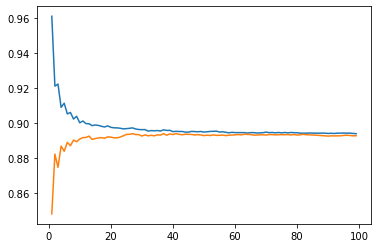

In [20]:
train_accuracies = []
test_accuracies = []
# building KNN model for values of k from 1 to 100
k_vals = [i for i in range(1,100)]
features = ["duration","age"]
target = "y"
for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    model.fit(X_train,Y_train)
    train_accuracy_k = model.score(X_train,Y_train)
    test_accuracy_k = model.score(X_test,Y_test)
    train_accuracies.append(train_accuracy_k)
    test_accuracies.append(test_accuracy_k)
plt.plot(k_vals,train_accuracies)
plt.plot(k_vals,test_accuracies)